In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords

In [73]:
sns.set_style("whitegrid")

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets/yasserh/amazon-product-reviews-dataset/7817_1.csv


In [75]:
df = pd.read_csv("/kaggle/input/datasets/yasserh/amazon-product-reviews-dataset/7817_1.csv")

In [76]:
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [77]:
df.tail()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces
1596,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I ordered this item to replace the one that no...,I am sending all of this crap back to amazon a...,NaN,NaN,DIANE K,NaN,NaN,4 ounces


In [78]:
df.shape

(1597, 27)

In [79]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [81]:
stop_words = set(stopwords.words('english'))

**Data Cleaning**

In [82]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [83]:
df['clean_review'] = df['reviews.text'].apply(clean_text)

**Create Sentiment Labels**

In [84]:
def label_sentiment(rating):
    if rating >= 4:
        return 1   
    elif rating == 3:
        return 0     
    else:
        return -1  

In [85]:
df['sentiment'] = df['reviews.rating'].apply(label_sentiment)

In [86]:
df['sentiment'].value_counts()

sentiment
 1    977
-1    496
 0    124
Name: count, dtype: int64

**Sentiment Distribution Plot**

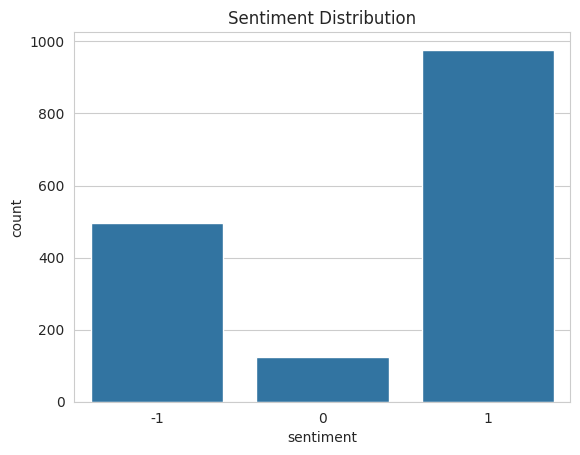

In [87]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

**Rating Distribution**

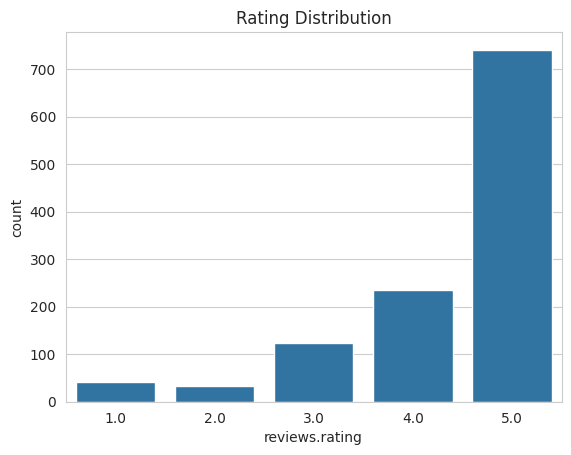

In [88]:
plt.figure()
sns.countplot(x='reviews.rating', data=df)
plt.title("Rating Distribution")
plt.show()

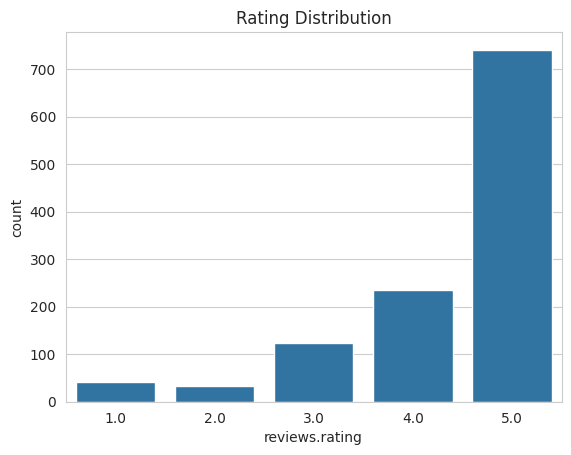

In [89]:
plt.figure()
sns.countplot(x='reviews.rating', data=df)
plt.title("Rating Distribution")
plt.show()

**Review Length Analysis**

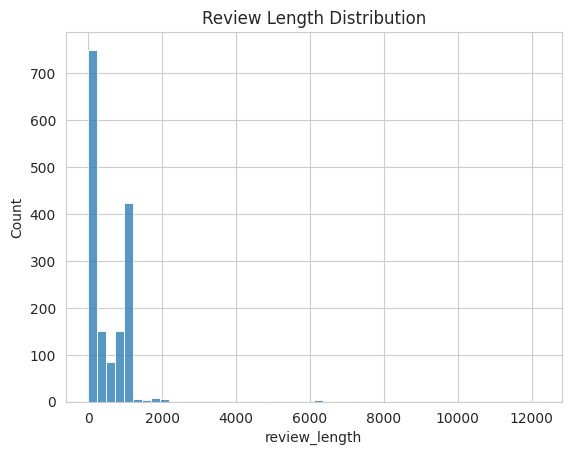

In [90]:
df['review_length'] = df['clean_review'].apply(len)

plt.figure()
sns.histplot(df['review_length'], bins=50)
plt.title("Review Length Distribution")
plt.show()

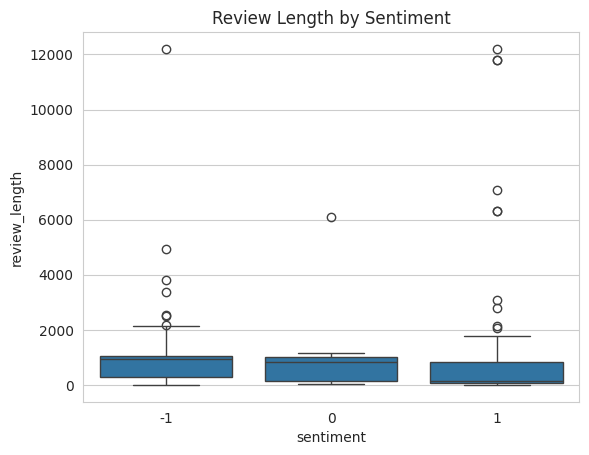

In [91]:
plt.figure()
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title("Review Length by Sentiment")
plt.show()

**Feature Engineering (TF-IDF)**

In [92]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

In [93]:
X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment']

**Train-Test Split**

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [95]:
df[['reviews.text','reviews.rating']].isnull().sum()

reviews.text        0
reviews.rating    420
dtype: int64

In [96]:
df = df.dropna(subset=['reviews.rating'])

In [97]:
df[['reviews.text','reviews.rating']].isnull().sum()

reviews.text      0
reviews.rating    0
dtype: int64

In [98]:
df['reviews.rating'] = df['reviews.rating'].astype(int)

In [99]:
def label_sentiment(rating):
    if rating >= 4:
        return 1
    elif rating == 3:
        return 0
    else:
        return -1

In [100]:
df['sentiment'] = df['reviews.rating'].apply(label_sentiment)

In [101]:
df['sentiment'].value_counts()

sentiment
 1    977
 0    124
-1     76
Name: count, dtype: int64

In [102]:
X = vectorizer.fit_transform(df['clean_review'])
y= df['sentiment']

In [103]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

In [104]:
X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

**Train Model**

In [106]:
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

In [107]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

**Model Evaluation**

In [108]:
y_pred = model.predict(X_test)

In [109]:
y_pred

array([ 1,  1,  1,  0, -1,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  0,  1, -1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1, -1,  1,  0,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  0,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  0, -1,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  0,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  0,  1, -1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [110]:
"Accuracy:", accuracy_score(y_test, y_pred)

('Accuracy:', 0.8898305084745762)

In [111]:
print("\nClassification Report:\n")
print("classification_report(y_test, y_pred)")


Classification Report:

classification_report(y_test, y_pred)


In [112]:
cm = confusion_matrix(y_test, y_pred)

In [113]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Axes: >

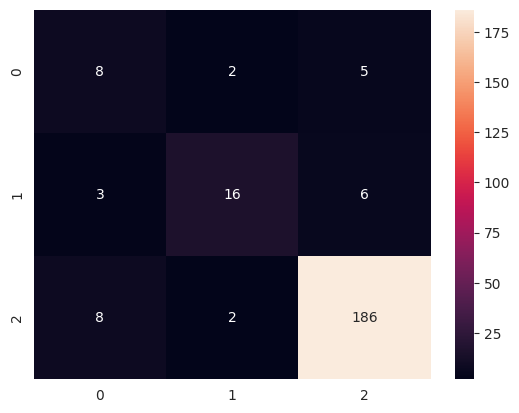

In [114]:
sns.heatmap(cm, annot=True, fmt='d')

**Confusion Matrix**

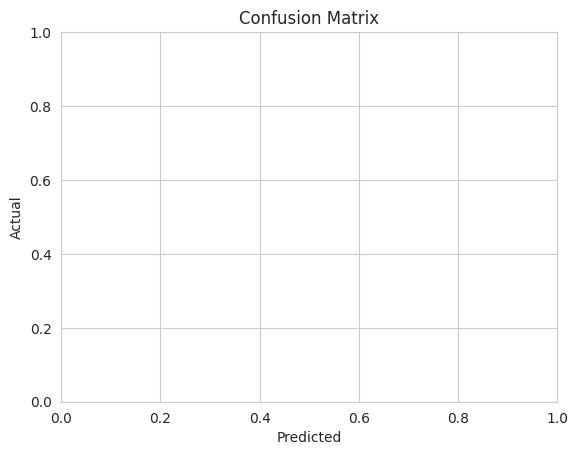

In [115]:
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [116]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [117]:
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])
y_score = model.predict_proba(X_test)

In [118]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

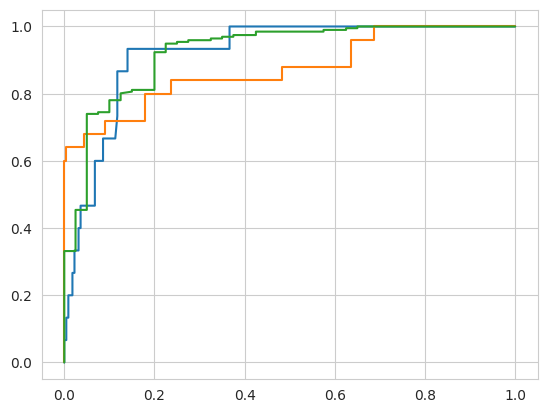

In [119]:
for i, class_label in enumerate([-1, 0, 1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

**ROC Curve**

/tmp/ipykernel_55/4235519228.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


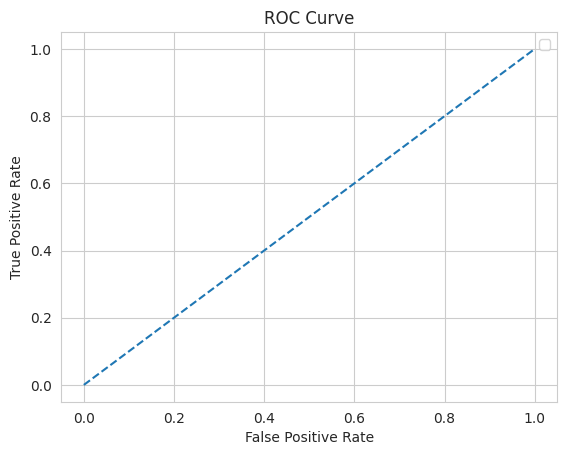

In [120]:
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [121]:
from wordcloud import WordCloud

In [122]:
positive_text = " ".join(df[df['sentiment'] == 1]['clean_review'])

In [123]:
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

In [124]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

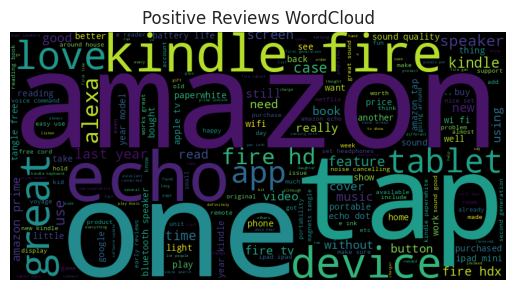

In [125]:
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive Reviews WordCloud")
plt.show()

In [126]:
from sklearn.svm import LinearSVC

In [127]:
svm_model = LinearSVC(class_weight='balanced')
svm_model.fit(X_train, y_train)

LinearSVC(class_weight='balanced')

In [128]:
svm_pred = svm_model.predict(X_test)

In [129]:
print("SVM Classification Report:\n")

SVM Classification Report:



In [130]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

          -1       0.50      0.20      0.29        15
           0       0.89      0.64      0.74        25
           1       0.91      0.98      0.94       196

    accuracy                           0.89       236
   macro avg       0.76      0.61      0.66       236
weighted avg       0.88      0.89      0.88       236



In [131]:
print("Logistic Accuracy:", accuracy_score(y_test, y_pred))

Logistic Accuracy: 0.8898305084745762


In [132]:
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.8940677966101694
